<h2>Learner 3: Perceptron</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import logisticClassify2 as lc
from importlib import reload

# Original data taken from txt files
x = np.genfromtxt("X_train.txt", delimiter = None)
y = np.genfromtxt("Y_train.txt", delimiter = None)
x_test = np.genfromtxt("X_test.txt", delimiter = None)

# Extract certain data out to be validation data
x_validation = x[10000:20000]
y_validation = y[10000:20000]

# Extract certain data out to be training data
x_train = x[0:10000]
y_train = y[0:10000]

In [2]:
# from mltools.linearC import linearClassify

# # Pick k features among the training data
# a, b = ml.transforms.fsvd(x_train, 2)
# x_tr = a
# x_tr, _ = ml.rescale(x_tr)
# y_tr = y_train

# # Pick k featurese from validation data
# c, d = ml.transforms.fsvd(x_validation, 2)
# x_val = c
# x_val, _ = ml.rescale(x_val)
# y_val = y_train

# # Train the perceptron model here
# perceptron = linearClassify(x_tr, y_tr, stopIter = 5000);

In [3]:
# # Plot the training data
# ml.plotClassify2D(perceptron, x, y)
# plt.show()

In [4]:
# # Plot the validation data
# ml.plotClassify2D(perceptron, x_val, y_val)
# plt.show()

In [5]:
# errTrain = perceptron.err(x_tr, y_tr)
# errValidation = perceptron.err(x_val, y_val)

# aucTrain = perceptron.auc(x_tr, y_tr)
# aucValidation = perceptron.auc(x_val, y_val)

# print(errTrain, errValidation)
# print(aucTrain, aucValidation)

In [6]:
from mltools.linearC import linearClassify

err_train = []
err_validation = []

auc_train = []
auc_validation = []

k = [i for i in range(1, 15)]

for i in k:
    
    # Pick k features among the training data
    a, b = ml.transforms.fsvd(x_train, i)
    x_tr = a
    x_tr, _ = ml.rescale(x_tr)
    y_tr = y_train

    # Pick k featurese from validation data
    c, d = ml.transforms.fsvd(x_validation, i)
    x_val = c
    x_val, _ = ml.rescale(x_val)
    y_val = y_train

    # Train the perceptron model here
    perceptron = linearClassify(x_tr, y_tr, stopIter = 5000);
    
    errTrain = perceptron.err(x_tr, y_tr)
    errValidation = perceptron.err(x_val, y_val)

    aucTrain = perceptron.auc(x_tr, y_tr)
    aucValidation = perceptron.auc(x_val, y_val)
    
    # Store data
    err_train.append(errTrain)
    err_validation.append(errValidation)
    auc_train.append(aucTrain)
    auc_validation.append(aucValidation)

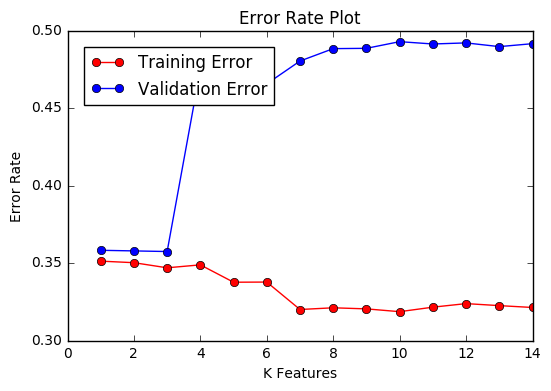

In [9]:
# Plot Error graph
plt.title("Error Rate Plot")
plt.plot(k, err_train, c = 'r', marker = 'o', label = "Training Error")
plt.plot(k, err_validation, c = 'b', marker = 'o', label = "Validation Error")
plt.legend(bbox_to_anchor = (0,1), loc = 2, borderaxespad = 1)

plt.xlim([0, 15])
plt.xlabel("K Features")
plt.ylabel("Error Rate")
plt.show()

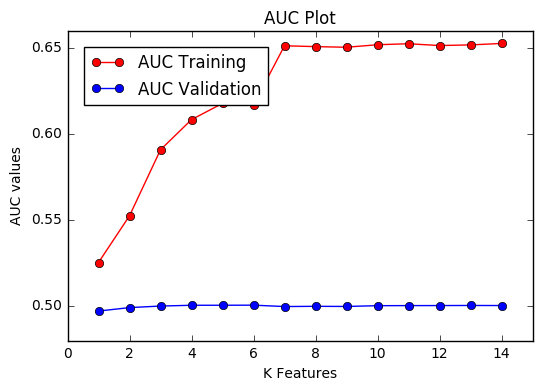

In [10]:
# Plot AUC graph
plt.title("AUC Plot")
plt.plot(k, auc_train, c = 'r', marker = 'o', label = "AUC Training")
plt.plot(k, auc_validation, c = 'b', marker = 'o', label = "AUC Validation")
plt.legend(bbox_to_anchor = (0,1), loc = 2, borderaxespad = 1)

plt.xlim([0, 15])
plt.xlabel("K Features")
plt.ylabel("AUC values")
plt.show()